In [9]:
# Load the necessary libraries
import pandas as pd

# File paths for the datasets
file_1 = 'C:/Users/bobi/Documents/DSC 640/w1&2/most-popular-netflix.xlsx'
file_2 = 'C:/Users/bobi/Documents/DSC 640/w1&2/all-weeks-countries-netflix.xlsx'
file_3 = 'C:/Users/bobi/Documents/DSC 640/w1&2/all-weeks-global-netflix.xlsx'

# Load the datasets
most_popular = pd.read_excel(file_1)
all_weeks_countries = pd.read_excel(file_2)
all_weeks_global = pd.read_excel(file_3)

# Display basic information about each dataset
most_popular_info = most_popular.head()
all_weeks_countries_info = all_weeks_countries.head()
all_weeks_global_info = all_weeks_global.head()

(most_popular_info, all_weeks_countries_info, all_weeks_global_info)


C:\Users\bobi\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\bobi\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\bobi\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(          category  rank              show_title season_title  \
 0  Films (English)     1              Red Notice          NaN   
 1  Films (English)     2           Don't Look Up          NaN   
 2  Films (English)     3        The Adam Project          NaN   
 3  Films (English)     4                Bird Box          NaN   
 4  Films (English)     5  Leave the World Behind          NaN   
 
    hours_viewed_first_91_days  runtime  views_first_91_days  
 0                   454200000   1.9667            230900000  
 1                   408600000   2.3833            171400000  
 2                   281000000   1.7833            157600000  
 3                   325300000   2.0667            157400000  
 4                   339300000   2.3667            143400000  ,
   country_name country_iso2        week category  weekly_rank  \
 0    Argentina           AR  2024-04-14    Films            1   
 1    Argentina           AR  2024-04-14    Films            2   
 2    Argentina          

In [10]:
# Preliminary data cleaning and preparation for merging and analysis

# Standardize column names for clarity and integration
most_popular.rename(columns={
    "category": "Category",
    "rank": "Rank",
    "show_title": "ShowTitle",
    "season_title": "SeasonTitle",
    "hours_viewed_first_91_days": "HoursViewed91Days",
    "runtime": "Runtime",
    "views_first_91_days": "Views91Days"
}, inplace=True)

all_weeks_countries.rename(columns={
    "country_name": "CountryName",
    "country_iso2": "CountryISO2",
    "week": "Week",
    "category": "Category",
    "weekly_rank": "WeeklyRank",
    "show_title": "ShowTitle",
    "season_title": "SeasonTitle",
    "cumulative_weeks_in_top_10": "WeeksInTop10"
}, inplace=True)

all_weeks_global.rename(columns={
    "week": "Week",
    "category": "Category",
    "weekly_rank": "WeeklyRank",
    "show_title": "ShowTitle",
    "season_title": "SeasonTitle",
    "weekly_hours_viewed": "WeeklyHoursViewed",
    "runtime": "Runtime",
    "weekly_views": "WeeklyViews",
    "cumulative_weeks_in_top_10": "WeeksInTop10",
    "is_staggered_launch": "IsStaggeredLaunch",
    "episode_launch_details": "EpisodeLaunchDetails"
}, inplace=True)

# Display cleaned data previews to confirm changes
most_popular_clean_preview = most_popular.head()
all_weeks_countries_clean_preview = all_weeks_countries.head()
all_weeks_global_clean_preview = all_weeks_global.head()

(most_popular_clean_preview, all_weeks_countries_clean_preview, all_weeks_global_clean_preview)


(          Category  Rank               ShowTitle SeasonTitle  \
 0  Films (English)     1              Red Notice         NaN   
 1  Films (English)     2           Don't Look Up         NaN   
 2  Films (English)     3        The Adam Project         NaN   
 3  Films (English)     4                Bird Box         NaN   
 4  Films (English)     5  Leave the World Behind         NaN   
 
    HoursViewed91Days  Runtime  Views91Days  
 0          454200000   1.9667    230900000  
 1          408600000   2.3833    171400000  
 2          281000000   1.7833    157600000  
 3          325300000   2.0667    157400000  
 4          339300000   2.3667    143400000  ,
   CountryName CountryISO2        Week Category  WeeklyRank  \
 0   Argentina          AR  2024-04-14    Films           1   
 1   Argentina          AR  2024-04-14    Films           2   
 2   Argentina          AR  2024-04-14    Films           3   
 3   Argentina          AR  2024-04-14    Films           4   
 4   Argentina  

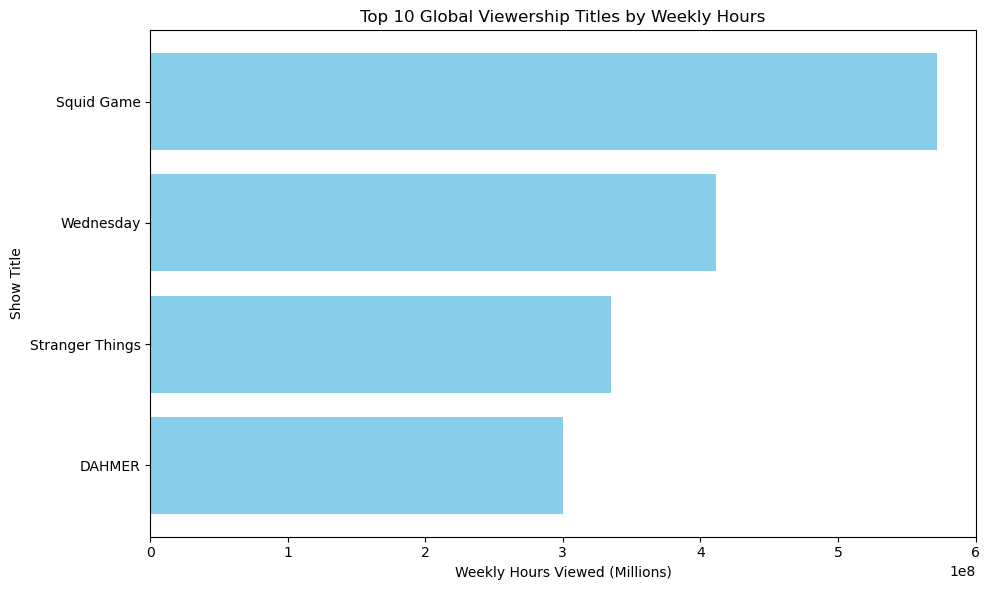

In [11]:
import matplotlib.pyplot as plt

# Visual 1: Global Viewership Trends (Top 10 Most Viewed Globally)
top_global_viewership = all_weeks_global.nlargest(10, 'WeeklyHoursViewed')[['ShowTitle', 'WeeklyHoursViewed']]
plt.figure(figsize=(10, 6))
plt.barh(top_global_viewership['ShowTitle'], top_global_viewership['WeeklyHoursViewed'], color='skyblue')
plt.xlabel('Weekly Hours Viewed (Millions)')
plt.ylabel('Show Title')
plt.title('Top 10 Global Viewership Titles by Weekly Hours')
plt.gca().invert_yaxis()  # Invert to show the largest bar on top
plt.tight_layout()
plt.show()

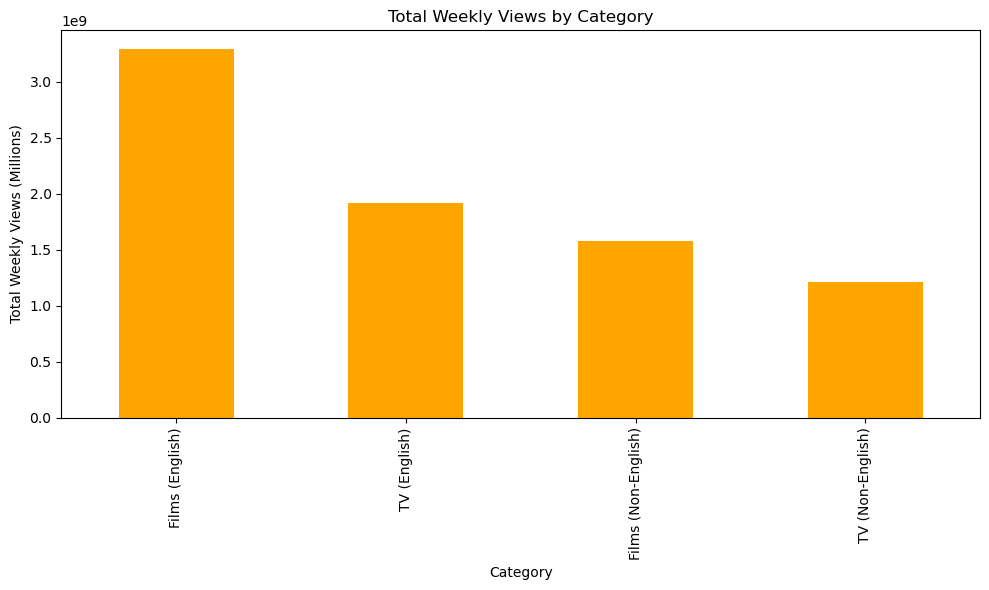

In [12]:

# Visual 2: Top Categories by Weekly Views
top_categories = all_weeks_global.groupby('Category')['WeeklyViews'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='orange')
plt.title('Total Weekly Views by Category')
plt.ylabel('Total Weekly Views (Millions)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

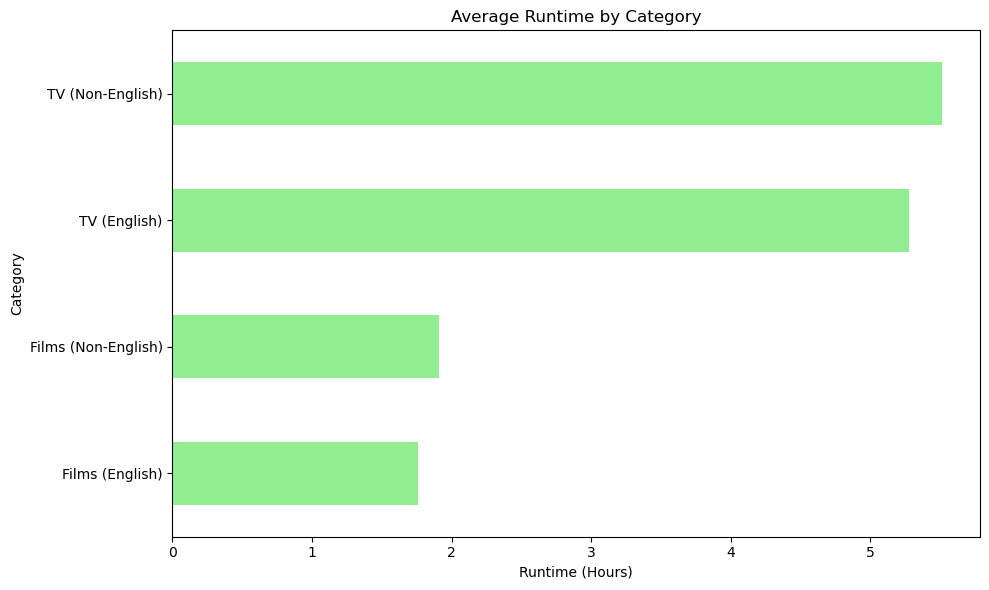

In [13]:
# Visual 3: Top Performers by Runtime (Category Analysis)
top_runtimes = all_weeks_global.groupby('Category')['Runtime'].mean().sort_values()
plt.figure(figsize=(10, 6))
top_runtimes.plot(kind='barh', color='lightgreen')
plt.title('Average Runtime by Category')
plt.xlabel('Runtime (Hours)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


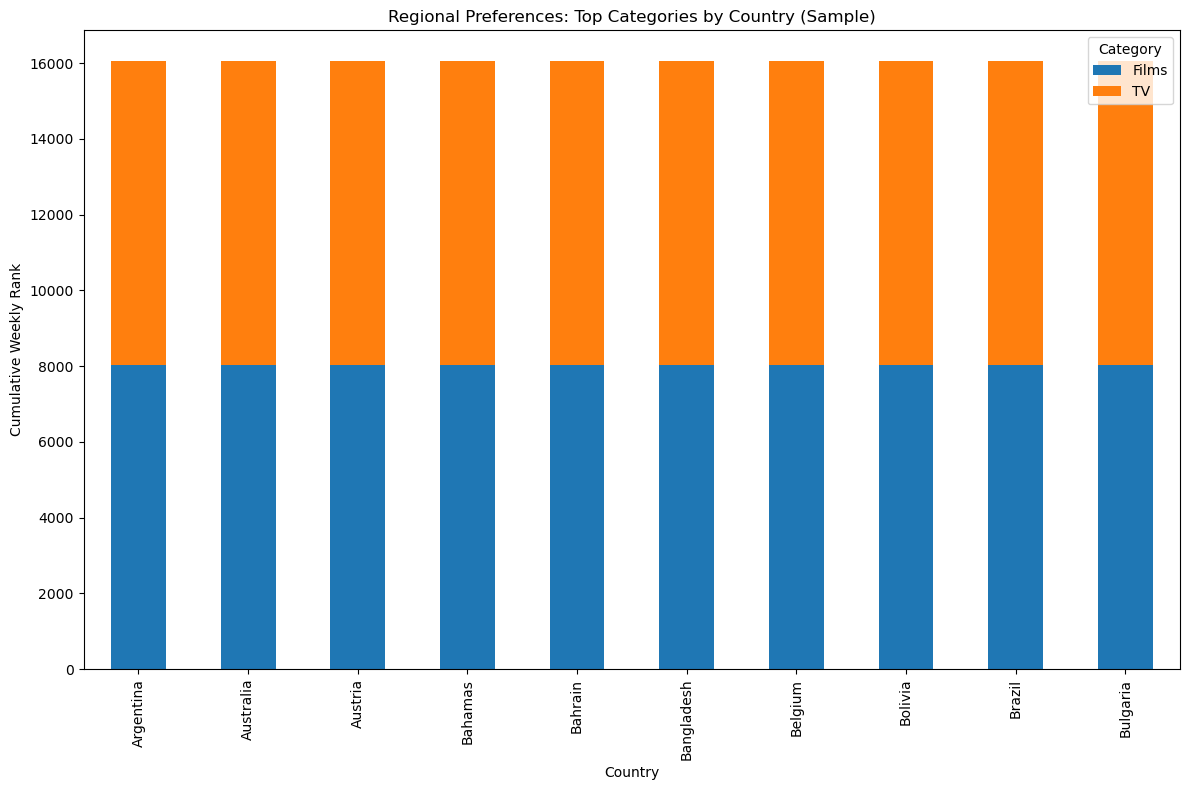

In [14]:
# Visual 4: Regional Preferences (Top Categories by Country)
top_categories_country = all_weeks_countries.groupby(['CountryName', 'Category']).sum()['WeeklyRank'].unstack().fillna(0)
top_categories_country.iloc[:10].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Regional Preferences: Top Categories by Country (Sample)')
plt.ylabel('Cumulative Weekly Rank')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

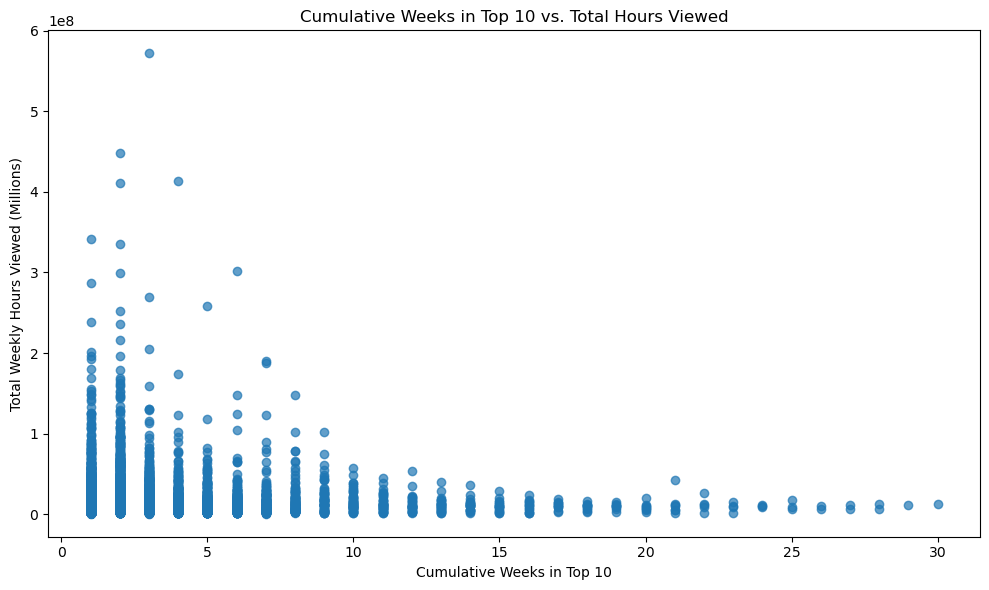

In [15]:

# Visual 5: Cumulative Success (Weeks in Top 10 vs. Total Hours Viewed)
plt.figure(figsize=(10, 6))
plt.scatter(all_weeks_global['WeeksInTop10'], all_weeks_global['WeeklyHoursViewed'], alpha=0.7)
plt.title('Cumulative Weeks in Top 10 vs. Total Hours Viewed')
plt.xlabel('Cumulative Weeks in Top 10')
plt.ylabel('Total Weekly Hours Viewed (Millions)')
plt.tight_layout()
plt.show()



C:\Users\bobi\AppData\Local\Temp\ipykernel_18660\2113731991.py:21: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
C:\Users\bobi\AppData\Local\Temp\ipykernel_18660\2113731991.py:21: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\bobi\AppData\Local\Temp\ipykernel_18660\2113731991.py:21: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  plt.tight_layout()
C:\Users\bobi\AppData\Local\Temp\ipykernel_18660\2113731991.py:21: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from current font.
  plt.tight_layout()
C:\Users\bobi\AppData\Local\Temp\ipykernel_18660\2113731991.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

C:\Users\bobi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bobi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bobi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bobi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


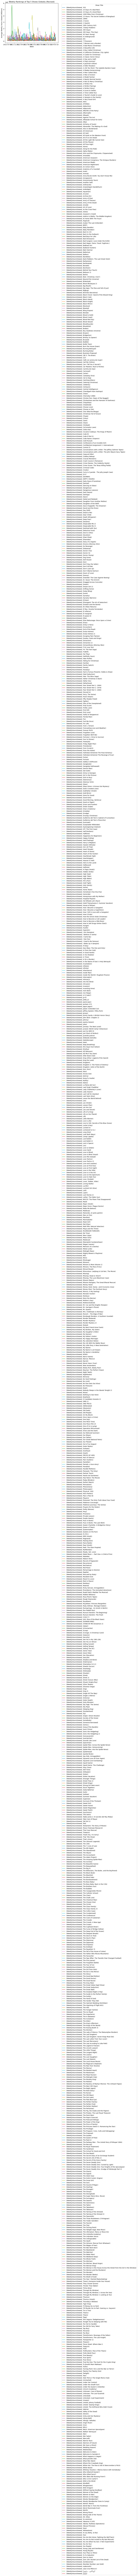

In [16]:
# Visual 6: Weekly Rankings Comparison (Top 5 Globally)

top_ranked_shows = all_weeks_global[all_weeks_global['WeeklyRank'] <= 5]

# Ensure only numeric columns are used for aggregation
numeric_columns = ['WeeklyHoursViewed']
weekly_trend = (
    top_ranked_shows
    .groupby(['Week', 'ShowTitle'])[numeric_columns]
    .mean()
    .unstack()
)

# Plotting
plt.figure(figsize=(12, 8))
weekly_trend.plot()
plt.title('Weekly Rankings of Top 5 Shows Globally (Revised)')
plt.ylabel('Average Weekly Hours Viewed (Millions)')
plt.xlabel('Week')
plt.legend(title='Show Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
